# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [2]:
from mxnet import nd, autograd, gluon

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [22]:
def sampler(probs, shape):
    ## Add your codes here
    ret=nd.zeros(shape=shape)
    m, n=shape
    num=1000 # time of sampling from U[0, 1]
    x=nd.zeros(shape=n)
    y=nd.random.uniform(shape=shape)
    for i in range(m):
        for j in range(n):
            x1=y[i]<probs[:j+1].sum() 
            x2=y[i]>probs[:j].sum()
            for k in range(n):
                if x1[k]==1 and x2[k]==1:
                    ret[i, k]=j
    return ret

# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (1000,3))


[[2. 2. 0.]
 [2. 1. 2.]
 [0. 2. 2.]
 ...
 [0. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]]
<NDArray 1000x3 @cpu(0)>


# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words.
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
    - We need to remove all punctuations and uniform all letters' cases.
* Why does it still work quite well?

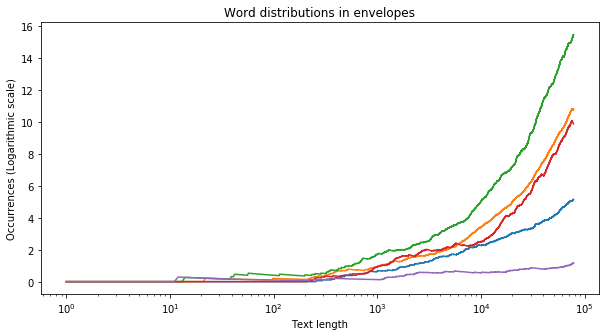

In [41]:
import re
import string
import matplotlib.pyplot as plt
import numpy as np
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')
with open(filename, encoding='utf-8') as f:
    book = f.read()
tokens=['a', 'and', 'the', 'i', 'is']
book=book.lower()
exclude = set(string.punctuation)
book=''.join(ch for ch in book if ch not in exclude)
word_list=book.split()
list_len=len(word_list)
word_count=np.zeros(shape=(list_len, len(tokens)))
for i in range(list_len):
    for j in range(len(tokens)):
        if tokens[j]==word_list[i]:
            word_count[i, j]=word_count[i-1, j]+1
        else:
            word_count[i, j]=word_count[i-1, j]
# print(word_count[0:100])
x=np.arange(1, list_len+1)
plt.figure(figsize=(10, 5))
plt.semilogx(x, word_count[:,0]/np.sqrt(x), label='a')
plt.semilogx(x, word_count[:,1]/np.sqrt(x), label='and')
plt.semilogx(x, word_count[:,2]/np.sqrt(x), label='the')
plt.semilogx(x, word_count[:,3]/np.sqrt(x), label='i')
plt.semilogx(x, word_count[:,4]/np.sqrt(x), label='is')
plt.title('Word distributions in envelopes')
plt.xlabel('Text length')
plt.ylabel('Occurrences (Logarithmic scale)')
plt.show()

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

Answers:

1. $\frac{\partial \mathbf y}{\partial \mathbf x}=\frac{\partial \mathbf y}{\partial \mathbf u}\frac{\partial \mathbf u}{\partial \mathbf x}$
2. Suppose $\mathbf u=\mathbf X\mathbf w-\mathbf y$, $\mathbf v=\mathbf X\mathbf w$, then
$$
\frac{\partial z}{\partial \mathbf w}=\frac{\partial z}{\partial \mathbf u}\frac{\partial \mathbf u}{\partial \mathbf v}\frac{\partial \mathbf v}{\partial \mathbf w}
$$
where
$$
z=\Vert \mathbf u\Vert^2, \mathbf u=\mathbf v-\mathbf y, \mathbf v=\mathbf X\mathbf w\\
\frac{\partial z}{\partial \mathbf u}=2\mathbf u^\top\\
\frac{\partial \mathbf u}{\partial \mathbf v}=\mathbf I-\frac{\partial \mathbf y}{\partial \mathbf v}=\mathbf I\\
\frac{\partial \mathbf v}{\partial \mathbf w}=\mathbf X
$$
Therefore
$$
\frac{\partial z}{\partial \mathbf w}=2(\mathbf X\mathbf w-\mathbf y)^\top\mathbf X
$$

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns a numerically stable version of 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$

In [5]:
def log_exp(x, y):
    ## add your solution here
    return -nd.log(nd.divide(nd.exp(x), nd.exp(x)+nd.exp(y)))

Test your codes with normal inputs:

In [6]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z


[1.3132617]
<NDArray 1 @cpu(0)>

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [7]:
def grad(forward_func, x, y): 
    x.attach_grad()
    y.attach_grad()
    with autograd.record():
        z=forward_func(x, y)
    z.backward()
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [8]:
grad(log_exp, x, y)

x.grad = 
[-0.7310586]
<NDArray 1 @cpu(0)>
y.grad = 
[0.7310586]
<NDArray 1 @cpu(0)>


But now let's try some "hard" inputs

In [9]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)

x.grad = 
[nan]
<NDArray 1 @cpu(0)>
y.grad = 
[nan]
<NDArray 1 @cpu(0)>


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [10]:
def stable_log_exp(x, y):
    ## Add your codes here
    if x>y:
        return -nd.log(1/(1+nd.exp(y-x)))
    else:
        return -nd.log(nd.exp(x-y)/(1+nd.exp(x-y)))
grad(stable_log_exp, x, y)

x.grad = 
[-1.]
<NDArray 1 @cpu(0)>
y.grad = 
[1.]
<NDArray 1 @cpu(0)>
